#Importing Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [5]:
train

,Id,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,0,2033-03-01,159.271109,167.221488,157.380478,161.915062,160.167043,40490589,Company_0
1,1,2033-03-01,114.571843,114.409664,112.921505,113.066659,87.844722,8592865,Company_1
2,2,2033-03-01,50.984499,51.262529,50.266272,50.094499,49.329834,25085661,Company_2
3,3,2033-03-01,98.585428,99.988079,97.867719,98.811966,91.784469,823271,Company_3
4,4,2033-03-01,8874.646107,8935.704765,8811.247764,8873.173069,8407.389386,609369,Company_4
...,...,...,...,...,...,...,...,...,...
7411,7411,2038-02-28,104.074758,104.325097,102.299154,102.070115,95.938421,17617907,Company_1
7412,7412,2038-02-28,6.825210,7.378966,6.536319,6.484569,6.664250,67725048,Company_2
7413,7413,2038-02-28,96.702497,102.527327,96.123058,101.977618,100.731773,5257824,Company_3
7414,7414,2038-02-28,8650.533559,8709.103373,8604.908934,8623.897896,8543.781858,370998,Company_4


In [6]:
train.describe()

,Id,Open,High,Low,Close,Adj Close,Volume
count,7416.000000,7416.000000,7416.000000,7416.000000,7416.000000,7416.000000,7.416000e+03
mean,3707.500000,1322.970742,1338.768595,1305.328823,1321.298741,1280.440414,3.975197e+07
std,2140.959131,2777.109807,2808.083803,2742.046008,2773.452166,2698.389268,1.102362e+08
min,0.000000,2.564008,2.507671,2.407399,2.358517,2.527507,1.277000e+03
25%,1853.750000,56.270001,57.199683,55.096529,55.836524,50.836902,1.034437e+06
50%,3707.500000,109.799270,111.421736,107.923378,109.613059,91.488025,6.081018e+06
75%,5561.250000,164.955953,167.238755,163.383748,165.097484,158.495970,2.029659e+07
max,7415.000000,9853.304141,9929.409504,9724.918827,9832.117608,9438.189612,1.073742e+09


In [7]:
# checking for missing values
train.isna().sum()

Id           0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64

In [8]:
# Understanding the data better
train.corr()

<ipython-input-8-d1053354c8fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Id,Open,High,Low,Close,Adj Close,Volume
Id,1.000000,0.013821,0.013974,0.014024,0.014048,0.021705,0.064501
Open,0.013821,1.000000,0.999904,0.999916,0.999822,0.999668,-0.164996
High,0.013974,0.999904,1.000000,0.999873,0.999932,0.999790,-0.165058
Low,0.014024,0.999916,0.999873,1.000000,0.999913,0.999758,-0.164926
Close,0.014048,0.999822,0.999932,0.999913,1.000000,0.999854,-0.164993
Adj Close,0.021705,0.999668,0.999790,0.999758,0.999854,1.000000,-0.164522
Volume,0.064501,-0.164996,-0.165058,-0.164926,-0.164993,-0.164522,1.000000


## Pivoting the data
Pivoting the data so that all the data is organized through dates.

In [9]:
# Pivot the DataFrame
df1 = train.pivot(index='Date', columns='Company', values=['Open', 'High', 'Low', 'Close' , 'Adj Close', 'Volume','Id'])
df2 = test.pivot(index='Date', columns='Company', values=['Id'])

# Flatten the MultiIndex columns
df1.columns = ['_'.join(col).strip() for col in df1.columns.values]
df2.columns = ['_'.join(col).strip() for col in df2.columns.values]

# Reset index for better structure
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)

# Display the result
df1.head()

,Date,Open_Company_0,Open_Company_1,Open_Company_2,Open_Company_3,Open_Company_4,Open_Company_5,High_Company_0,High_Company_1,High_Company_2,...,Volume_Company_2,Volume_Company_3,Volume_Company_4,Volume_Company_5,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,2033-03-01,159.271109,114.571843,50.984499,98.585428,8874.646107,136.430652,167.221488,114.409664,51.262529,...,25085661.0,823271.0,609369.0,2576112.0,0.0,1.0,2.0,3.0,4.0,5.0
1,2033-03-05,158.049337,113.266631,50.534860,99.338531,8867.074823,135.100632,167.347904,113.161314,49.383999,...,15073917.0,830714.0,388180.0,3945470.0,6.0,7.0,8.0,9.0,10.0,11.0
2,2033-03-06,163.686732,110.756424,49.838053,97.339020,8855.832360,137.119321,167.057890,112.339453,50.240192,...,16314199.0,1287970.0,543686.0,6137704.0,12.0,13.0,14.0,15.0,16.0,17.0
3,2033-03-07,160.461622,109.827335,49.242896,93.144173,8621.791003,135.576175,161.422258,111.136768,49.930463,...,22678239.0,1755708.0,598715.0,3130801.0,18.0,19.0,20.0,21.0,22.0,23.0
4,2033-03-08,150.289989,111.168595,48.728623,90.821417,8699.274117,136.789364,154.889808,111.415207,49.391428,...,33250438.0,1441977.0,533856.0,5446693.0,24.0,25.0,26.0,27.0,28.0,29.0


In [10]:
df2.head()

,Date,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,2038-03-01,0,1,2,3,4,5
1,2038-03-02,6,7,8,9,10,11
2,2038-03-03,12,13,14,15,16,17
3,2038-03-06,18,19,20,21,22,23
4,2038-03-08,24,25,26,27,28,29


In [27]:
df = df1.drop(['Date'] , axis=1)
df.head()

,Open_Company_0,Open_Company_1,Open_Company_2,Open_Company_3,Open_Company_4,Open_Company_5,High_Company_0,High_Company_1,High_Company_2,High_Company_3,...,Volume_Company_2,Volume_Company_3,Volume_Company_4,Volume_Company_5,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,159.271109,114.571843,50.984499,98.585428,8874.646107,136.430652,167.221488,114.409664,51.262529,99.988079,...,25085661.0,823271.0,609369.0,2576112.0,0.0,1.0,2.0,3.0,4.0,5.0
1,158.049337,113.266631,50.534860,99.338531,8867.074823,135.100632,167.347904,113.161314,49.383999,99.160609,...,15073917.0,830714.0,388180.0,3945470.0,6.0,7.0,8.0,9.0,10.0,11.0
2,163.686732,110.756424,49.838053,97.339020,8855.832360,137.119321,167.057890,112.339453,50.240192,97.927173,...,16314199.0,1287970.0,543686.0,6137704.0,12.0,13.0,14.0,15.0,16.0,17.0
3,160.461622,109.827335,49.242896,93.144173,8621.791003,135.576175,161.422258,111.136768,49.930463,94.091662,...,22678239.0,1755708.0,598715.0,3130801.0,18.0,19.0,20.0,21.0,22.0,23.0
4,150.289989,111.168595,48.728623,90.821417,8699.274117,136.789364,154.889808,111.415207,49.391428,93.319480,...,33250438.0,1441977.0,533856.0,5446693.0,24.0,25.0,26.0,27.0,28.0,29.0


In [12]:
test_d = df2.drop(['Date'] , axis=1)
test_d.head()

,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29


In [28]:
df.columns

Index(['Open_Company_0', 'Open_Company_1', 'Open_Company_2', 'Open_Company_3',
       'Open_Company_4', 'Open_Company_5', 'High_Company_0', 'High_Company_1',
       'High_Company_2', 'High_Company_3', 'High_Company_4', 'High_Company_5',
       'Low_Company_0', 'Low_Company_1', 'Low_Company_2', 'Low_Company_3',
       'Low_Company_4', 'Low_Company_5', 'Close_Company_0', 'Close_Company_1',
       'Close_Company_2', 'Close_Company_3', 'Close_Company_4',
       'Close_Company_5', 'Adj Close_Company_0', 'Adj Close_Company_1',
       'Adj Close_Company_2', 'Adj Close_Company_3', 'Adj Close_Company_4',
       'Adj Close_Company_5', 'Volume_Company_0', 'Volume_Company_1',
       'Volume_Company_2', 'Volume_Company_3', 'Volume_Company_4',
       'Volume_Company_5', 'Id_Company_0', 'Id_Company_1', 'Id_Company_2',
       'Id_Company_3', 'Id_Company_4', 'Id_Company_5'],
      dtype='object')

In [14]:
# The close company values of train data is stored separately in features dataframe because the test data is given in the form of company id and close values only.
features = df[['Close_Company_0', 'Close_Company_1', 'Close_Company_2', 'Close_Company_3', 'Close_Company_4', 'Close_Company_5']]
features

,Close_Company_0,Close_Company_1,Close_Company_2,Close_Company_3,Close_Company_4,Close_Company_5
0,161.915062,113.066659,50.094499,98.811966,8873.173069,135.882546
1,163.108507,110.561246,49.250071,96.594597,8794.758109,135.970813
2,161.716298,109.651386,48.878616,93.602065,8616.178598,136.070561
3,148.051907,109.723772,48.670564,90.718080,8679.165970,135.772818
4,148.483368,109.118052,47.642654,90.771456,8729.613528,137.854360
...,...,...,...,...,...,...
1231,273.183503,95.343456,7.386902,96.758536,8659.146383,171.312821
1232,273.416583,98.352903,6.134974,102.175757,8696.124743,169.310179
1233,270.560046,103.677731,7.301937,99.276798,8660.695734,170.810543
1234,265.683943,103.974218,6.219622,96.482185,8632.196362,173.046282


## Plotting dataset close values

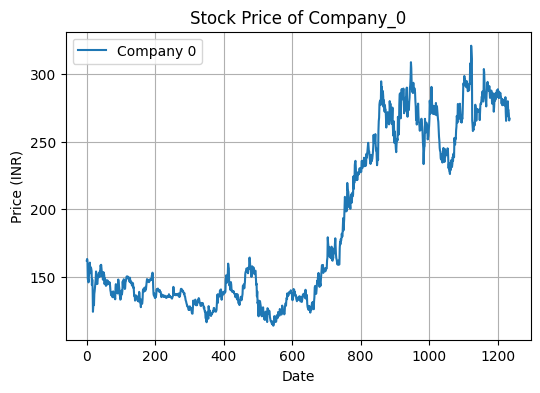

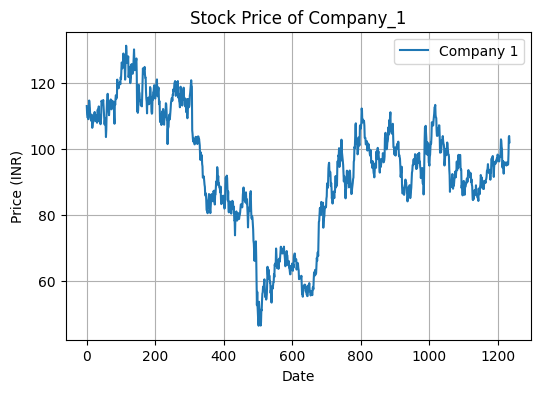

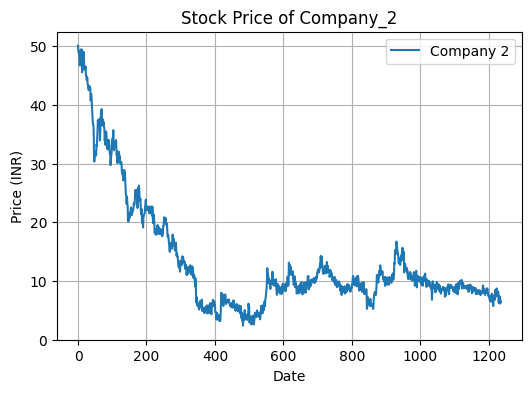

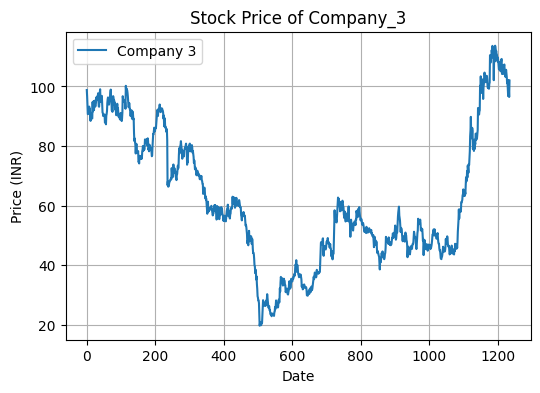

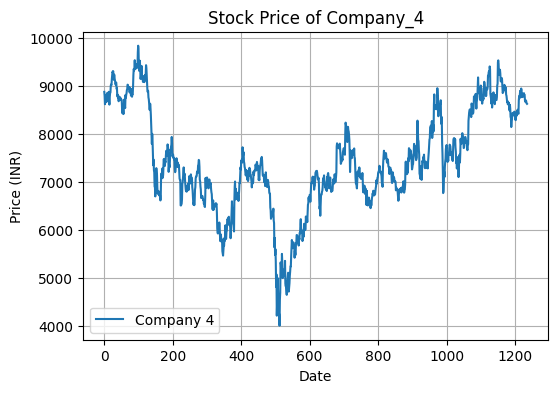

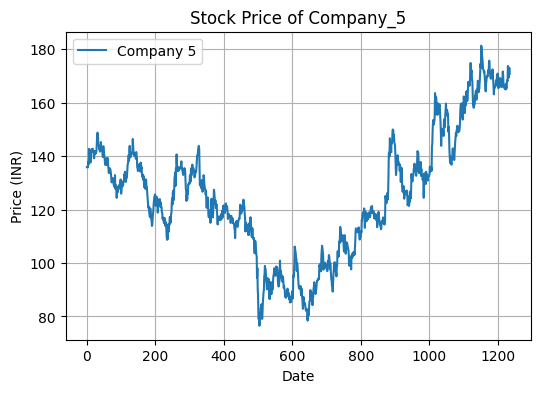

In [15]:
# Plotting close prices for each company
for i in range(6):
    plt.figure(figsize=(6, 4))
    plt.plot(features[f'Close_Company_{i}'], label=f'Company {i}')
    plt.title(f"Stock Price of Company_{i}")
    plt.xlabel("Date")
    plt.ylabel("Price (INR)")
    plt.grid(True)
    plt.legend()
    plt.show()



##Plotting Moving Average for 100 Days and 10 Days

In [17]:
ma100 = df.Close_Company_0.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1231    280.485559
1232    280.579953
1233    280.665021
1234    280.650419
1235    280.547307
Name: Close_Company_0, Length: 1236, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days of Company_0')

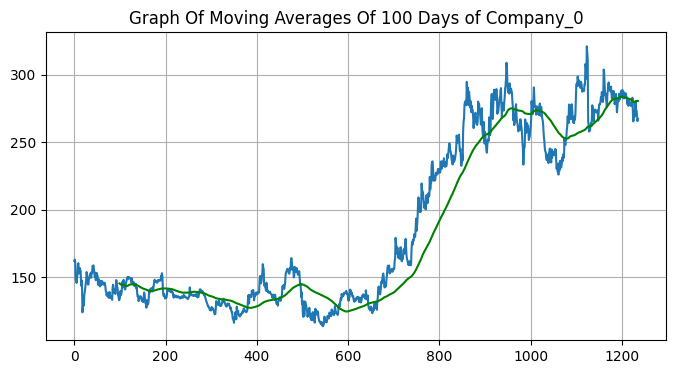

In [23]:
plt.figure(figsize = (8,4))
plt.plot(df.Close_Company_0)
plt.plot(ma100, 'g')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days of Company_0')

In [24]:
ma10 = df.Close_Company_0.rolling(10).mean()
ma10

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1231    273.812018
1232    273.486755
1233    272.248842
1234    271.631555
1235    271.795428
Name: Close_Company_0, Length: 1236, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days(green) And 10 Days(red) Moving Averages of Company_0')

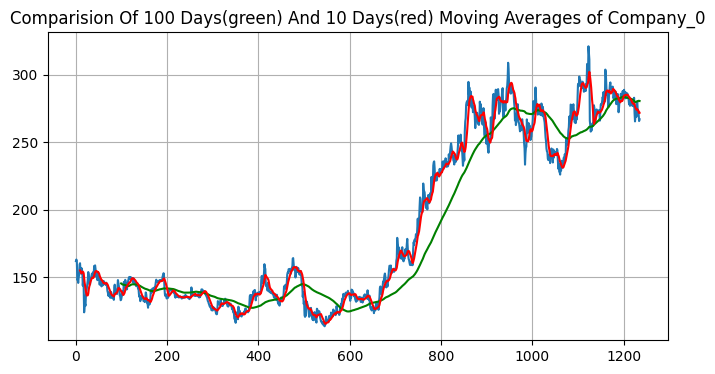

In [29]:
#Plotting comparison between Moving Average of 100 Days and 10 Days

plt.figure(figsize = (8,4))
plt.plot(df.Close_Company_0)
plt.plot(ma100, 'g')
plt.plot(ma10, 'r')
plt.grid(True)
plt.title('Comparision Of 100 Days(green) And 10 Days(red) Moving Averages of Company_0')

#Normalizing Dataset using MinMax Scaler

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
# Retrieve just the numeric input values
data = features.values[:, :6]

# Perform a MinMaxScaler transform of the dataset
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Convert the scaled array back to a DataFrame
dataset_scaled = pd.DataFrame(data_scaled)

# Summarize the scaled dataset
dataset_scaled

,0,1,2,3,4,5
0,0.232705,0.784631,1.000000,0.841810,0.835245,0.566548
1,0.238458,0.755159,0.982310,0.818217,0.821773,0.567391
2,0.231746,0.744456,0.974529,0.786375,0.791092,0.568343
3,0.165869,0.745307,0.970171,0.755688,0.801913,0.565500
4,0.167949,0.738182,0.948637,0.756256,0.810581,0.585373
...,...,...,...,...,...,...
1231,0.769143,0.576146,0.105337,0.819961,0.798474,0.904805
1232,0.770267,0.611547,0.079111,0.877602,0.804827,0.885686
1233,0.756495,0.674185,0.103558,0.846756,0.798740,0.900010
1234,0.732987,0.677673,0.080885,0.817020,0.793843,0.921355


# Forming Training and Test Datasets

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(dataset_scaled[0:int(len(dataset_scaled)*0.70)])
test = pd.DataFrame(dataset_scaled[int(len(dataset_scaled)*0.70): int(len(dataset_scaled))])

train_array = train.values
test_array = test.values

print(train_array.shape)
print(test_array.shape)

(865, 6)
(371, 6)


In [ ]:
# Initialize arrays for each company
train_array_0 = np.zeros((865, 1))
train_array_1 = np.zeros((865, 1))
train_array_2 = np.zeros((865, 1))
train_array_3 = np.zeros((865, 1))
train_array_4 = np.zeros((865, 1))
train_array_5 = np.zeros((865, 1))

# Split the data into arrays for each company
for i in range(865):
    train_array_0[i] = train_array[i][0]
    train_array_1[i] = train_array[i][1]
    train_array_2[i] = train_array[i][2]
    train_array_3[i] = train_array[i][3]
    train_array_4[i] = train_array[i][4]
    train_array_5[i] = train_array[i][5]

# Print the shapes of the arrays
print("Shape of train_array_0:", train_array_0.shape)
print("Shape of train_array_1:", train_array_1.shape)
print("Shape of train_array_2:", train_array_2.shape)
print("Shape of train_array_3:", train_array_3.shape)
print("Shape of train_array_4:", train_array_4.shape)
print("Shape of train_array_5:", train_array_5.shape)



Shape of train_array_0: (865, 1)
Shape of train_array_1: (865, 1)
Shape of train_array_2: (865, 1)
Shape of train_array_3: (865, 1)
Shape of train_array_4: (865, 1)
Shape of train_array_5: (865, 1)


In [ ]:
# Initialize arrays for each company
test_array_0 = np.zeros((371, 1))
test_array_1 = np.zeros((371, 1))
test_array_2 = np.zeros((371, 1))
test_array_3 = np.zeros((371, 1))
test_array_4 = np.zeros((371, 1))
test_array_5 = np.zeros((371, 1))

# Split the data into arrays for each company
for i in range(371):
    test_array_0[i] = test_array[i][0]
    test_array_1[i] = test_array[i][1]
    test_array_2[i] = test_array[i][2]
    test_array_3[i] = test_array[i][3]
    test_array_4[i] = test_array[i][4]
    test_array_5[i] = test_array[i][5]

# Print the shapes of the arrays
print("Shape of test_array_0:", test_array_0.shape)
print("Shape of test_array_1:", test_array_1.shape)
print("Shape of test_array_2:", test_array_2.shape)
print("Shape of test_array_3:", test_array_3.shape)
print("Shape of test_array_4:", test_array_4.shape)
print("Shape of test_array_5:", test_array_5.shape)


Shape of test_array_0: (371, 1)
Shape of test_array_1: (371, 1)
Shape of test_array_2: (371, 1)
Shape of test_array_3: (371, 1)
Shape of test_array_4: (371, 1)
Shape of test_array_5: (371, 1)


In [ ]:
# Define the number of time steps
time_steps = 10

# Initialize lists to store x_train and y_train for each company
x_train_lists = [[] for _ in range(6)]
y_train_lists = [[] for _ in range(6)]

# Split the data into x_train and y_train for each company
for company_data, x_train_list, y_train_list in zip([train_array_0, train_array_1, train_array_2, train_array_3, train_array_4, train_array_5], x_train_lists, y_train_lists):
    x_train_company = []
    y_train_company = []

    # Iterate through the data to create sequences of length `time_steps`
    for i in range(len(company_data) - time_steps):
        x_train_company.append(company_data[i:i+time_steps])
        y_train_company.append(company_data[i+time_steps])

    # Append the sequences to the corresponding lists for each company
    x_train_list.extend(x_train_company)
    y_train_list.extend(y_train_company)

# Convert lists to numpy arrays for each company and name each array differently
x_train_array_0 = np.array(x_train_lists[0])
y_train_array_0 = np.array(y_train_lists[0])
x_train_array_1 = np.array(x_train_lists[1])
y_train_array_1 = np.array(y_train_lists[1])
x_train_array_2 = np.array(x_train_lists[2])
y_train_array_2 = np.array(y_train_lists[2])
x_train_array_3 = np.array(x_train_lists[3])
y_train_array_3 = np.array(y_train_lists[3])
x_train_array_4 = np.array(x_train_lists[4])
y_train_array_4 = np.array(y_train_lists[4])
x_train_array_5 = np.array(x_train_lists[5])
y_train_array_5 = np.array(y_train_lists[5])

# Check the shapes of x_train and y_train for each company
for i, (x_train, y_train) in enumerate(zip([x_train_array_0, x_train_array_1, x_train_array_2, x_train_array_3, x_train_array_4, x_train_array_5], [y_train_array_0, y_train_array_1, y_train_array_2, y_train_array_3, y_train_array_4, y_train_array_5])):
    print(f"Company {i}:")
    print("x_train shape:", x_train.shape)
    print("y_train shape:", y_train.shape)


Company 0:
x_train shape: (855, 10, 1)
y_train shape: (855, 1)
Company 1:
x_train shape: (855, 10, 1)
y_train shape: (855, 1)
Company 2:
x_train shape: (855, 10, 1)
y_train shape: (855, 1)
Company 3:
x_train shape: (855, 10, 1)
y_train shape: (855, 1)
Company 4:
x_train shape: (855, 10, 1)
y_train shape: (855, 1)
Company 5:
x_train shape: (855, 10, 1)
y_train shape: (855, 1)


In [ ]:
# Define the number of time steps
time_steps = 10

# Initialize lists to store x_test and y_test for each company
x_test_lists = [[] for _ in range(6)]
y_test_lists = [[] for _ in range(6)]

# Split the data into x_test and y_test for each company
for company_data, x_test_list, y_test_list in zip([test_array_0, test_array_1, test_array_2, test_array_3, test_array_4, test_array_5], x_test_lists, y_test_lists):
    x_test_company = []
    y_test_company = []

    # Iterate through the data to create sequences of length `time_steps`
    for i in range(len(company_data) - time_steps):
        x_test_company.append(company_data[i:i+time_steps])
        y_test_company.append(company_data[i+time_steps])

    # Append the sequences to the corresponding lists for each company
    x_test_list.extend(x_test_company)
    y_test_list.extend(y_test_company)

# Convert lists to numpy arrays for each company and name each array differently
x_test_array_0 = np.array(x_test_lists[0])
y_test_array_0 = np.array(y_test_lists[0])
x_test_array_1 = np.array(x_test_lists[1])
y_test_array_1 = np.array(y_test_lists[1])
x_test_array_2 = np.array(x_test_lists[2])
y_test_array_2 = np.array(y_test_lists[2])
x_test_array_3 = np.array(x_test_lists[3])
y_test_array_3 = np.array(y_test_lists[3])
x_test_array_4 = np.array(x_test_lists[4])
y_test_array_4 = np.array(y_test_lists[4])
x_test_array_5 = np.array(x_test_lists[5])
y_test_array_5 = np.array(y_test_lists[5])

# Check the shapes of x_test and y_test for each company
for i, (x_test, y_test) in enumerate(zip([x_test_array_0, x_test_array_1, x_test_array_2, x_test_array_3, x_test_array_4, x_test_array_5], [y_test_array_0, y_test_array_1, y_test_array_2, y_test_array_3, y_test_array_4, y_test_array_5])):
    print(f"Company {i}:")
    print("x_test shape:", x_test.shape)
    print("y_test shape:", y_test.shape)


Company 0:
x_test shape: (361, 10, 1)
y_test shape: (361, 1)
Company 1:
x_test shape: (361, 10, 1)
y_test shape: (361, 1)
Company 2:
x_test shape: (361, 10, 1)
y_test shape: (361, 1)
Company 3:
x_test shape: (361, 10, 1)
y_test shape: (361, 1)
Company 4:
x_test shape: (361, 10, 1)
y_test shape: (361, 1)
Company 5:
x_test shape: (361, 10, 1)
y_test shape: (361, 1)


# Building Stacked LSTM Model

In [ ]:
### Create the Stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',  metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Steps that were used in the folowing section (Training Model):
1. Fitting the Model
2. Saving the Model
3. Predicting on the past 10 days
## For Company 1

In [ ]:
model.fit(x_train_array_0,y_train_array_0,validation_data=(x_test_array_0,y_test_array_0),epochs=100,batch_size=69,verbose=1)

Epoch 1/100
13/13 [==============================] - 6s 93ms/step - loss: 0.0212 - root_mean_squared_error: 0.1454 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1143
Epoch 2/100
13/13 [==============================] - 0s 16ms/step - loss: 0.0032 - root_mean_squared_error: 0.0568 - val_loss: 0.0387 - val_root_mean_squared_error: 0.1968
Epoch 3/100
13/13 [==============================] - 0s 16ms/step - loss: 0.0015 - root_mean_squared_error: 0.0388 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1104
Epoch 4/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0013 - root_mean_squared_error: 0.0364 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0640
Epoch 5/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0012 - root_mean_squared_error: 0.0343 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0653
Epoch 6/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0040 - val_

In [ ]:
model.save('Company_0_model')

In [ ]:
past_10_days_0 = pd.DataFrame(train_array_0[-10:])
test_df_0 = pd.DataFrame(test_array_0)
final_df_0 = past_10_days_0.append(test_df_0, ignore_index = True)
input_data_0 = scaler.fit_transform(final_df_0)

x_test_0 = []
y_test_0 = []
for i in range(10, input_data_0.shape[0]):
   x_test_0.append(input_data_0[i-10: i])
   y_test_0.append(input_data_0[i,0:6])

x_test_0, y_test_0 = np.array(x_test_0), np.array(y_test_0)
y_pred_0 = model.predict(x_test_0)

scale_factor = 1 / scaler.scale_
y_pred_0 = y_pred_0 * scale_factor
y_test_0 = y_test_0 * scale_factor

<ipython-input-30-92faca6e19d5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_0 = past_10_days_0.append(test_df_0, ignore_index = True)


12/12 [==============================] - 1s 6ms/step


## For Company 2

In [ ]:
model.fit(x_train_array_1,y_train_array_1,validation_data=(x_test_array_1,y_test_array_1),epochs=100,batch_size=69,verbose=1)

Epoch 1/100
13/13 [==============================] - 5s 93ms/step - loss: 0.0026 - root_mean_squared_error: 0.0506 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0378
Epoch 2/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0012 - root_mean_squared_error: 0.0347 - val_loss: 6.8121e-04 - val_root_mean_squared_error: 0.0261
Epoch 3/100
13/13 [==============================] - 0s 18ms/step - loss: 8.9071e-04 - root_mean_squared_error: 0.0298 - val_loss: 8.0296e-04 - val_root_mean_squared_error: 0.0283
Epoch 4/100
13/13 [==============================] - 0s 18ms/step - loss: 9.2065e-04 - root_mean_squared_error: 0.0303 - val_loss: 6.7271e-04 - val_root_mean_squared_error: 0.0259
Epoch 5/100
13/13 [==============================] - 0s 18ms/step - loss: 8.7258e-04 - root_mean_squared_error: 0.0295 - val_loss: 6.6616e-04 - val_root_mean_squared_error: 0.0258
Epoch 6/100
13/13 [==============================] - 0s 17ms/step - loss: 8.9127e-04 - root_mean_squared_error: 

In [ ]:
model.save('Company_1_model')

In [ ]:
past_10_days_1 = pd.DataFrame(train_array_1[-10:])
test_df_1 = pd.DataFrame(test_array_1)
final_df_1 = past_10_days_1.append(test_df_1, ignore_index = True)
input_data_1 = scaler.fit_transform(final_df_1)

x_test_1 = []
y_test_1 = []
for i in range(10, input_data_1.shape[0]):
   x_test_1.append(input_data_1[i-10: i])
   y_test_1.append(input_data_1[i,0:6])

x_test_1, y_test_1 = np.array(x_test_1), np.array(y_test_1)
y_pred_1 = model.predict(x_test_1)

scale_factor = 1 / scaler.scale_
y_pred_1 = y_pred_1 * scale_factor
y_test_1 = y_test_1 * scale_factor

12/12 [==============================] - 0s 4ms/step


<ipython-input-44-8995c4306b8b>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_1 = past_10_days_1.append(test_df_1, ignore_index = True)


##For Company 3

In [ ]:
model.fit(x_train_array_2,y_train_array_2,validation_data=(x_test_array_2,y_test_array_2),epochs=100,batch_size=69,verbose=1)

Epoch 1/100
13/13 [==============================] - 0s 21ms/step - loss: 3.5280e-04 - root_mean_squared_error: 0.0188 - val_loss: 2.1028e-04 - val_root_mean_squared_error: 0.0145
Epoch 2/100
13/13 [==============================] - 0s 16ms/step - loss: 3.3529e-04 - root_mean_squared_error: 0.0183 - val_loss: 1.8553e-04 - val_root_mean_squared_error: 0.0136
Epoch 3/100
13/13 [==============================] - 0s 27ms/step - loss: 3.1928e-04 - root_mean_squared_error: 0.0179 - val_loss: 1.8308e-04 - val_root_mean_squared_error: 0.0135
Epoch 4/100
13/13 [==============================] - 0s 26ms/step - loss: 3.1620e-04 - root_mean_squared_error: 0.0178 - val_loss: 1.8797e-04 - val_root_mean_squared_error: 0.0137
Epoch 5/100
13/13 [==============================] - 0s 27ms/step - loss: 3.2383e-04 - root_mean_squared_error: 0.0180 - val_loss: 1.8681e-04 - val_root_mean_squared_error: 0.0137
Epoch 6/100
13/13 [==============================] - 0s 25ms/step - loss: 3.1501e-04 - root_mean_squ

In [ ]:
model.save('Company_2_model')

In [ ]:
past_10_days_2 = pd.DataFrame(train_array_2[-10:])
test_df_2 = pd.DataFrame(test_array_2)
final_df_2 = past_10_days_2.append(test_df_2, ignore_index = True)
input_data_2 = scaler.fit_transform(final_df_2)

x_test_2 = []
y_test_2 = []
for i in range(10, input_data_2.shape[0]):
   x_test_2.append(input_data_2[i-10: i])
   y_test_2.append(input_data_2[i,0:6])

x_test_2, y_test_2 = np.array(x_test_2), np.array(y_test_2)
y_pred_2 = model.predict(x_test_2)

scale_factor = 1 / scaler.scale_
y_pred_2 = y_pred_2 * scale_factor
y_test_2 = y_test_2 * scale_factor

12/12 [==============================] - 0s 4ms/step


<ipython-input-47-e1113bb5a803>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_2 = past_10_days_2.append(test_df_2, ignore_index = True)


## For Company 4

In [ ]:
model.fit(x_train_array_3,y_train_array_3,validation_data=(x_test_array_3,y_test_array_3),epochs=100,batch_size=69,verbose=1)

Epoch 1/100
13/13 [==============================] - 0s 24ms/step - loss: 3.0935e-04 - root_mean_squared_error: 0.0176 - val_loss: 5.6776e-04 - val_root_mean_squared_error: 0.0238
Epoch 2/100
13/13 [==============================] - 0s 19ms/step - loss: 3.1704e-04 - root_mean_squared_error: 0.0178 - val_loss: 6.1454e-04 - val_root_mean_squared_error: 0.0248
Epoch 3/100
13/13 [==============================] - 0s 21ms/step - loss: 3.0281e-04 - root_mean_squared_error: 0.0174 - val_loss: 4.6163e-04 - val_root_mean_squared_error: 0.0215
Epoch 4/100
13/13 [==============================] - 0s 17ms/step - loss: 2.9554e-04 - root_mean_squared_error: 0.0172 - val_loss: 4.5333e-04 - val_root_mean_squared_error: 0.0213
Epoch 5/100
13/13 [==============================] - 0s 18ms/step - loss: 3.0512e-04 - root_mean_squared_error: 0.0175 - val_loss: 4.8530e-04 - val_root_mean_squared_error: 0.0220
Epoch 6/100
13/13 [==============================] - 0s 20ms/step - loss: 3.0564e-04 - root_mean_squ

In [ ]:
model.save('Company_3_model')

In [ ]:
past_10_days_3 = pd.DataFrame(train_array_3[-10:])
test_df_3 = pd.DataFrame(test_array_3)
final_df_3 = past_10_days_3.append(test_df_3, ignore_index = True)
input_data_3 = scaler.fit_transform(final_df_3)

x_test_3 = []
y_test_3 = []
for i in range(10, input_data_3.shape[0]):
   x_test_3.append(input_data_3[i-10: i])
   y_test_3.append(input_data_3[i,0:6])

x_test_3, y_test_3 = np.array(x_test_3), np.array(y_test_3)
y_pred_3 = model.predict(x_test_3)

scale_factor = 1 / scaler.scale_
y_pred_3 = y_pred_3 * scale_factor
y_test_3 = y_test_3 * scale_factor

12/12 [==============================] - 0s 6ms/step


<ipython-input-50-393de6a47534>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_3 = past_10_days_3.append(test_df_3, ignore_index = True)


## For Company 5

In [ ]:
model.fit(x_train_array_4,y_train_array_4,validation_data=(x_test_array_4,y_test_array_4),epochs=100,batch_size=69,verbose=1)

Epoch 1/100
13/13 [==============================] - 0s 20ms/step - loss: 5.5105e-04 - root_mean_squared_error: 0.0235 - val_loss: 5.7884e-04 - val_root_mean_squared_error: 0.0241
Epoch 2/100
13/13 [==============================] - 0s 17ms/step - loss: 5.5809e-04 - root_mean_squared_error: 0.0236 - val_loss: 6.3630e-04 - val_root_mean_squared_error: 0.0252
Epoch 3/100
13/13 [==============================] - 0s 18ms/step - loss: 6.3129e-04 - root_mean_squared_error: 0.0251 - val_loss: 7.0037e-04 - val_root_mean_squared_error: 0.0265
Epoch 4/100
13/13 [==============================] - 0s 17ms/step - loss: 5.7025e-04 - root_mean_squared_error: 0.0239 - val_loss: 5.9508e-04 - val_root_mean_squared_error: 0.0244
Epoch 5/100
13/13 [==============================] - 0s 16ms/step - loss: 5.6443e-04 - root_mean_squared_error: 0.0238 - val_loss: 5.9845e-04 - val_root_mean_squared_error: 0.0245
Epoch 6/100
13/13 [==============================] - 0s 18ms/step - loss: 5.6295e-04 - root_mean_squ

In [ ]:
model.save('Company_4_model')

In [ ]:
past_10_days_4 = pd.DataFrame(y_train_array_4[-10:])
test_df_4 = pd.DataFrame(test_array_4)
final_df_4 = past_10_days_4.append(test_df_4, ignore_index = True)
input_data_4 = scaler.fit_transform(final_df_4)

x_test_4 = []
y_test_4 = []
for i in range(10, input_data_4.shape[0]):
   x_test_4.append(input_data_4[i-10: i])
   y_test_4.append(input_data_4[i,0:6])

x_test_4, y_test_4 = np.array(x_test_4), np.array(y_test_4)
y_pred_4 = model.predict(x_test_4)

scale_factor = 1 / scaler.scale_
y_pred_4 = y_pred_4 * scale_factor
y_test_4 = y_test_4 * scale_factor

12/12 [==============================] - 0s 4ms/step


<ipython-input-54-a41348ff816b>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_4 = past_10_days_4.append(test_df_4, ignore_index = True)


## For Company 6

In [ ]:
model.fit(x_train_array_5,y_train_array_5,validation_data=(x_test_array_5,y_test_array_5),epochs=100,batch_size=69,verbose=1)

Epoch 1/100
13/13 [==============================] - 0s 34ms/step - loss: 4.2281e-04 - root_mean_squared_error: 0.0206 - val_loss: 6.7898e-04 - val_root_mean_squared_error: 0.0261
Epoch 2/100
13/13 [==============================] - 0s 27ms/step - loss: 4.1947e-04 - root_mean_squared_error: 0.0205 - val_loss: 6.1309e-04 - val_root_mean_squared_error: 0.0248
Epoch 3/100
13/13 [==============================] - 0s 17ms/step - loss: 4.1454e-04 - root_mean_squared_error: 0.0204 - val_loss: 6.2935e-04 - val_root_mean_squared_error: 0.0251
Epoch 4/100
13/13 [==============================] - 0s 17ms/step - loss: 3.9149e-04 - root_mean_squared_error: 0.0198 - val_loss: 6.3777e-04 - val_root_mean_squared_error: 0.0253
Epoch 5/100
13/13 [==============================] - 0s 18ms/step - loss: 3.8219e-04 - root_mean_squared_error: 0.0195 - val_loss: 5.8771e-04 - val_root_mean_squared_error: 0.0242
Epoch 6/100
13/13 [==============================] - 0s 18ms/step - loss: 3.8698e-04 - root_mean_squ

In [ ]:
model.save('Company_5_model')

In [ ]:
past_10_days_5 = pd.DataFrame(y_train_array_5[-10:])
test_df_5 = pd.DataFrame(test_array_5)
final_df_5 = past_10_days_5.append(test_df_5, ignore_index = True)
input_data_5 = scaler.fit_transform(final_df_5)

x_test_5 = []
y_test_5 = []
for i in range(10, input_data_5.shape[0]):
   x_test_5.append(input_data_5[i-10: i])
   y_test_5.append(input_data_5[i,0:6])

x_test_5, y_test_5 = np.array(x_test_5), np.array(y_test_5)
y_pred_5 = model.predict(x_test_5)

scale_factor = 1 / scaler.scale_
y_pred_5 = y_pred_5 * scale_factor
y_test_5 = y_test_5 * scale_factor

12/12 [==============================] - 0s 4ms/step


<ipython-input-58-a12f84a070fe>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_5 = past_10_days_5.append(test_df_5, ignore_index = True)


## Plotting the predicted and the actual closing price  



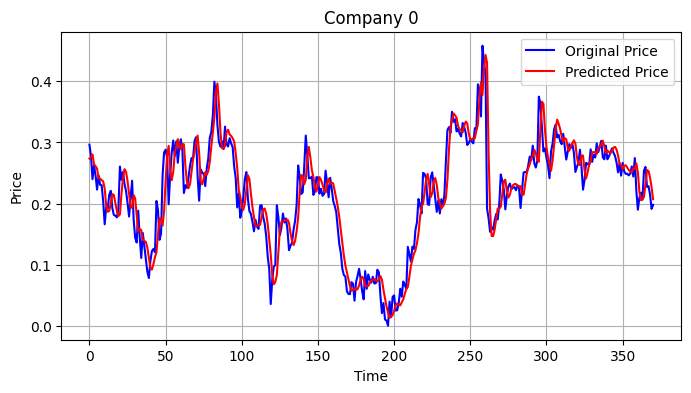

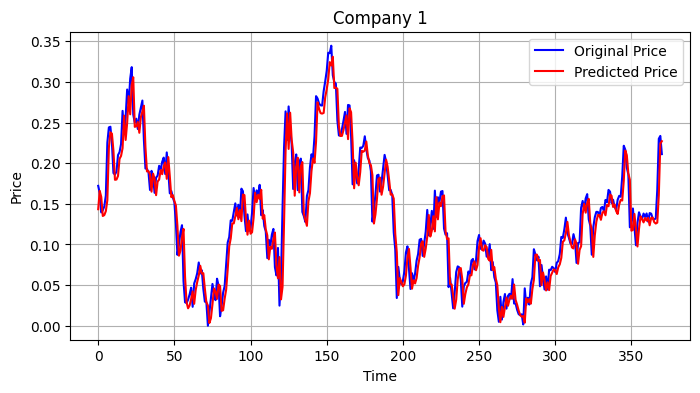

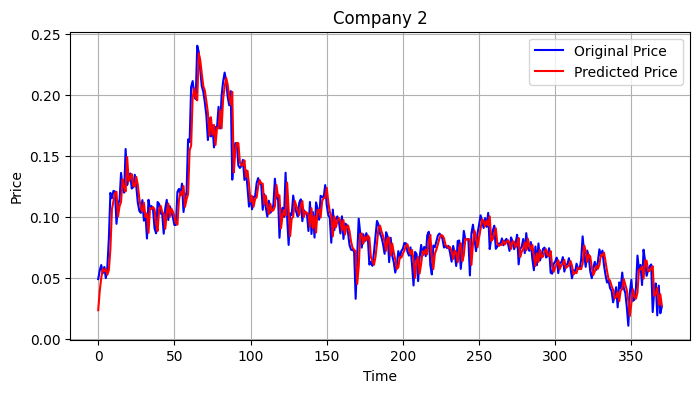

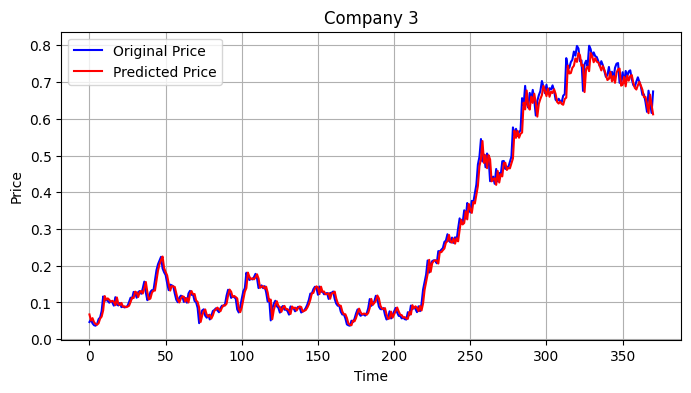

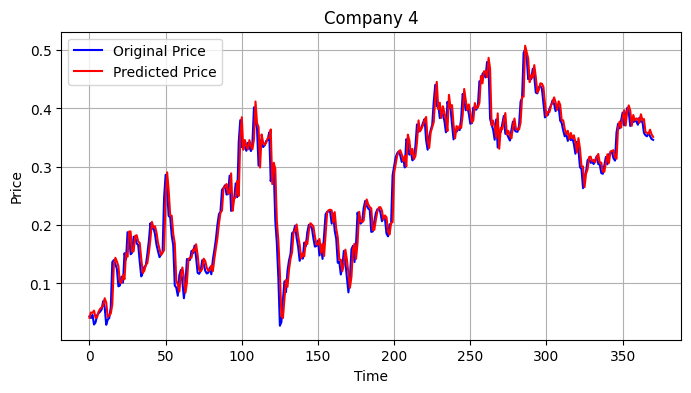

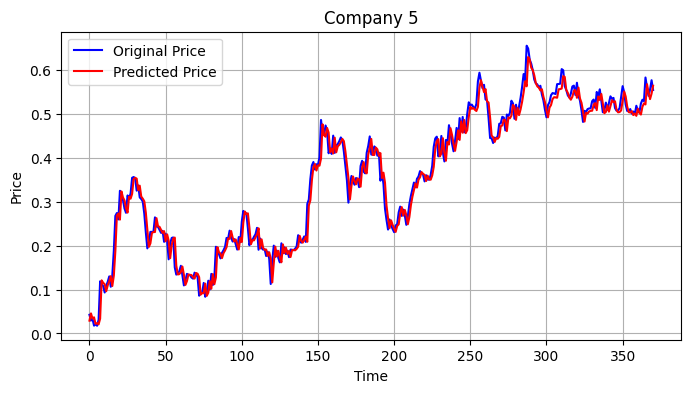

In [ ]:
features = ['y_test_0', 'y_test_1', 'y_test_2', 'y_test_3', 'y_test_4', 'y_test_5']
targets = ['y_pred_0', 'y_pred_1', 'y_pred_2', 'y_pred_3', 'y_pred_4', 'y_pred_5']



# Iterate over each company's data
for i, (feature, target) in enumerate(zip(features, targets)):
  plt.figure(figsize=(8, 4))
  plt.plot(eval(feature), 'b', label="Original Price")
  plt.plot(eval(target), 'r', label="Predicted Price")
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.legend()
  plt.grid(True)
  plt.title(f"Company {i}")
  plt.show()


# Working on Test data


In [ ]:
df2


,Date,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,2038-03-01,0,1,2,3,4,5
1,2038-03-02,6,7,8,9,10,11
2,2038-03-03,12,13,14,15,16,17
3,2038-03-06,18,19,20,21,22,23
4,2038-03-08,24,25,26,27,28,29
...,...,...,...,...,...,...,...
91,2038-07-17,546,547,548,549,550,551
92,2038-07-18,552,553,554,555,556,557
93,2038-07-19,558,559,560,561,562,563
94,2038-07-20,564,565,566,567,568,569


In [ ]:
#dropping date column
df3 = df2.drop(['Date'] , axis=1)
df3

,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
...,...,...,...,...,...,...
91,546,547,548,549,550,551
92,552,553,554,555,556,557
93,558,559,560,561,562,563
94,564,565,566,567,568,569


# Forecasting
####1.Checking the shape of x_test
####2.Reshaping the size for predicting closing prince of 1 day using last 10 days.
####3.Repeating the same process for next 96 days.
####4.Scale the test dataset according to given dataset to inverse MinMax scaler

## Company 1

In [ ]:
x_test_0.shape

(371, 10, 1)

In [ ]:
for sample in x_test_0:
    x_input_0 = sample[-10:].reshape((1, 10))
print( x_input_0.shape)

(1, 10)


In [ ]:
lst_output_0 = []
n_steps = 10
next_number_of_days = 96
temp_input_0 = list(x_input_0[0])  # Convert x_input_0 to a list

# Access the model for company 0
from tensorflow.keras.models import load_model
model = load_model('/content/Company_0_model')

i = 0
while i < next_number_of_days:
    if len(temp_input_0) > n_steps:
        x_input_0 = np.array(temp_input_0[-n_steps:], dtype=float)  # Ensure dtype=float
        x_input_0 = x_input_0.reshape((1, n_steps, 1))  # Reshape input directly
        yhat_0 = model.predict(x_input_0, verbose=0)
        temp_input_0.append(yhat_0[0][0])  # Append predicted value to temp_input_0
        lst_output_0.append(yhat_0[0][0])  # Append predicted value to lst_output_0
    else:
        x_input_0 = np.array(temp_input_0, dtype=float).reshape((1, len(temp_input_0), 1))  # Ensure dtype=float and reshape input directly
        yhat_0 = model.predict(x_input_0, verbose=0)
        temp_input_0.append(yhat_0[0][0])  # Append predicted value to temp_input_0
        lst_output_0.append(yhat_0[0][0])  # Append predicted value to lst_output_0
    i += 1

print(lst_output_0)


[0.45184204, 0.43943322, 0.4387953, 0.44257158, 0.4492885, 0.45392162, 0.4577148, 0.46233064, 0.46585134, 0.46928144, 0.47357252, 0.47695246, 0.48064774, 0.48447317, 0.48840815, 0.49240708, 0.4965133, 0.50073826, 0.50505334, 0.5094798, 0.51402026, 0.51865226, 0.5234, 0.52825993, 0.5332347, 0.5383275, 0.54354286, 0.548884, 0.5543546, 0.5599586, 0.56569964, 0.57158107, 0.57760745, 0.5837822, 0.59010917, 0.5965921, 0.6032353, 0.6100426, 0.6170175, 0.6241643, 0.6314863, 0.6389877, 0.6466715, 0.6545414, 0.66260064, 0.6708521, 0.67929876, 0.6879426, 0.69678634, 0.70583105, 0.71507806, 0.7245282, 0.7341815, 0.74403715, 0.7540941, 0.7643503, 0.77480257, 0.7854472, 0.7962794, 0.807293, 0.8184814, 0.8298361, 0.841348, 0.8530065, 0.8647997, 0.8767148, 0.8887376, 0.90085274, 0.91304356, 0.925293, 0.9375825, 0.9498929, 0.9622046, 0.9744974, 0.9867506, 0.99894357, 1.011056, 1.0230674, 1.0349579, 1.0467083, 1.0583007, 1.0697172, 1.0809414, 1.0919586, 1.1027547, 1.1133171, 1.1236348, 1.1336982, 1.1434

In [ ]:
lst_output_0 = np.array(lst_output_0)
minimum_0 = df['Close_Company_0'].min()
maximum_0 = df['Close_Company_0'].max()
lst_output_0=(lst_output_0*(maximum_0-minimum_0))+minimum_0
lst_output_0

array([207.36871, 204.79486, 204.66254, 205.44582, 206.83905, 207.80005,
       208.58684, 209.54425, 210.27452, 210.986  , 211.87607, 212.57712,
       213.3436 , 214.13708, 214.95328, 215.78275, 216.63446, 217.5108 ,
       218.40582, 219.32397, 220.26576, 221.22653, 222.2113 , 223.21936,
       224.25124, 225.30759, 226.38936, 227.49722, 228.63194, 229.79431,
       230.98514, 232.20508, 233.45506, 234.73584, 236.04819, 237.39288,
       238.77081, 240.18279, 241.62953, 243.11191, 244.63065, 246.18661,
       247.78036, 249.41275, 251.08441, 252.79596, 254.54794, 256.34088,
       258.17523, 260.0513 , 261.96933, 263.92947, 265.9318 , 267.97604,
       270.06207, 272.18942, 274.35742, 276.56534, 278.81216, 281.09662,
       283.41733, 285.77252, 288.16034, 290.57855, 293.02472, 295.49615,
       297.98993, 300.50287, 303.0315 , 305.5723 , 308.12137, 310.6748 ,
       313.22852, 315.7783 , 318.31985, 320.84894, 323.3613 , 325.85272,
       328.31906, 330.75635, 333.16086, 335.52884, 

In [ ]:
len(lst_output_0)

96

## Company 2

In [ ]:
x_test_1.shape

(371, 10, 1)

In [ ]:
for sample in x_test_1:
    x_input_1 = sample[-10:].reshape((1, 10))
print( x_input_1.shape)

(1, 10)


In [ ]:
temp_input_1 = list(x_input_1)
temp_input_1 = temp_input_1[0].tolist()

In [ ]:
lst_output_1 = []
n_steps = 10
next_number_of_days = 96
temp_input_1 = list(x_input_1[0])  # Convert x_input_0 to a list

# Access the model for company 0
from tensorflow.keras.models import load_model
model = load_model('/content/Company_1_model')

i = 0
while i < next_number_of_days:
    if len(temp_input_1) > n_steps:
        x_input_1 = np.array(temp_input_1[-n_steps:], dtype=float)  # Ensure dtype=float
        x_input_1 = x_input_1.reshape((1, n_steps, 1))  # Reshape input directly
        yhat_1 = model.predict(x_input_1, verbose=0)
        temp_input_1.append(yhat_1[0][0])  # Append predicted value to temp_input_0
        lst_output_1.append(yhat_1[0][0])  # Append predicted value to lst_output_0
    else:
        x_input_1 = np.array(temp_input_1, dtype=float).reshape((1, len(temp_input_1), 1))  # Ensure dtype=float and reshape input directly
        yhat_1 = model.predict(x_input_1, verbose=0)
        temp_input_1.append(yhat_1[0][0])  # Append predicted value to temp_input_0
        lst_output_1.append(yhat_1[0][0])  # Append predicted value to lst_output_0
    i += 1

print(lst_output_1)


[0.6590447, 0.63484174, 0.60991824, 0.5868691, 0.56684977, 0.5499182, 0.5355499, 0.5230266, 0.5113419, 0.49942735, 0.48714876, 0.47453797, 0.46166787, 0.448624, 0.4354797, 0.42228705, 0.40907794, 0.3958689, 0.38266763, 0.36947957, 0.35631275, 0.34317854, 0.33009145, 0.31706867, 0.30413002, 0.29129696, 0.27859265, 0.26604122, 0.25366783, 0.24149795, 0.22955737, 0.21787174, 0.20646614, 0.19536486, 0.18459071, 0.1741649, 0.16410668, 0.15443297, 0.1451581, 0.13629359, 0.12784807, 0.11982732, 0.11223394, 0.10506776, 0.098325625, 0.09200188, 0.08608832, 0.08057463, 0.075448446, 0.07069587, 0.06630159, 0.062249195, 0.058521528, 0.055100918, 0.051969398, 0.049108896, 0.046501588, 0.044129863, 0.04197664, 0.04002532, 0.03826008, 0.036665794, 0.035228178, 0.03393371, 0.032769684, 0.031724308, 0.030786682, 0.029946584, 0.029194634, 0.028522361, 0.027921729, 0.027385622, 0.026907515, 0.026481364, 0.026101835, 0.025763996, 0.025463466, 0.025196254, 0.024958737, 0.02474774, 0.024560377, 0.024394069,

In [ ]:
lst_output_1 = np.array(lst_output_1)
minimum_1 = df['Close_Company_1'].min()
maximum_1 = df['Close_Company_1'].max()
lst_output_1=(lst_output_1*(maximum_1-minimum_1))+minimum_1
lst_output_1

array([102.390625, 100.333145,  98.21441 ,  96.25502 ,  94.55318 ,
        93.11383 ,  91.892395,  90.82779 ,  89.83449 ,  88.82164 ,
        87.77784 ,  86.7058  ,  85.611725,  84.50287 ,  83.38548 ,
        82.26398 ,  81.14108 ,  80.01819 ,  78.89595 ,  77.77484 ,
        76.65553 ,  75.539   ,  74.426476,  73.31942 ,  72.21951 ,
        71.12858 ,  70.04859 ,  68.9816  ,  67.92975 ,  66.89519 ,
        65.88013 ,  64.886734,  63.917152,  62.973442,  62.057533,
        61.17124 ,  60.3162  ,  59.49384 ,  58.70539 ,  57.95182 ,
        57.23387 ,  56.552032,  55.906525,  55.29733 ,  54.724182,
        54.186607,  53.6839  ,  53.215183,  52.779408,  52.375393,
        52.00184 ,  51.657345,  51.340458,  51.049675,  50.783466,
        50.540295,  50.31865 ,  50.11703 ,  49.933987,  49.768105,
        49.618042,  49.482513,  49.360302,  49.25026 ,  49.151306,
        49.06244 ,  48.982735,  48.911316,  48.847393,  48.790245,
        48.739185,  48.69361 ,  48.65297 ,  48.61674 ,  48.584

## Company 3

In [ ]:
x_test_2.shape

(371, 10, 1)

In [ ]:
for sample in x_test_2:
    x_input_2 = sample[-10:].reshape((1, 10))
print( x_input_2.shape)

(1, 10)


In [ ]:
lst_output_2 = []
n_steps = 10
next_number_of_days = 96
temp_input_2 = list(x_input_2[0])  # Convert x_input_0 to a list

# Access the model for company 0
from tensorflow.keras.models import load_model
model = load_model('/content/Company_2_model')

i = 0
while i < next_number_of_days:
    if len(temp_input_2) > n_steps:
        x_input_2 = np.array(temp_input_2[-n_steps:], dtype=float)  # Ensure dtype=float
        x_input_2 = x_input_2.reshape((1, n_steps, 1))  # Reshape input directly
        yhat_2 = model.predict(x_input_2, verbose=0)
        temp_input_2.append(yhat_2[0][0])  # Append predicted value to temp_input_0
        lst_output_2.append(yhat_2[0][0])  # Append predicted value to lst_output_0
    else:
        x_input_2 = np.array(temp_input_2, dtype=float).reshape((1, len(temp_input_2), 1))  # Ensure dtype=float and reshape input directly
        yhat_2 = model.predict(x_input_2, verbose=0)
        temp_input_2.append(yhat_2[0][0])  # Append predicted value to temp_input_0
        lst_output_2.append(yhat_2[0][0])  # Append predicted value to lst_output_0
    i += 1

print(lst_output_2)


[0.11260619, 0.1102089, 0.10909219, 0.10825623, 0.10757076, 0.10684961, 0.106289156, 0.1058185, 0.10528237, 0.10487003, 0.1043802, 0.10392555, 0.10347804, 0.10303867, 0.102606975, 0.102182664, 0.10176539, 0.10135509, 0.100951746, 0.10055516, 0.10016536, 0.09978217, 0.0994055, 0.09903526, 0.098671354, 0.09831371, 0.097962245, 0.09761685, 0.09727744, 0.09694391, 0.09661621, 0.096294224, 0.09597787, 0.09566708, 0.095361754, 0.095061824, 0.09476719, 0.094477765, 0.09419347, 0.093914285, 0.093640044, 0.093370736, 0.09310624, 0.09284652, 0.092591435, 0.09234096, 0.09209503, 0.09185354, 0.091616444, 0.09138361, 0.091155045, 0.09093066, 0.09071034, 0.09049407, 0.09028177, 0.090073355, 0.08986878, 0.08966795, 0.08947084, 0.08927737, 0.089087464, 0.088901095, 0.088718176, 0.088538684, 0.0883625, 0.08818957, 0.08801989, 0.08785339, 0.08768998, 0.08752963, 0.087372325, 0.087217934, 0.08706647, 0.08691784, 0.086772, 0.08662893, 0.086488545, 0.0863508, 0.08621569, 0.086083114, 0.08595307, 0.08582546

In [ ]:
lst_output_2 = np.array(lst_output_2)
minimum_2 = df['Close_Company_2'].min()
maximum_2 = df['Close_Company_2'].max()
lst_output_2=(lst_output_2*(maximum_2-minimum_2))+minimum_2
lst_output_2

array([7.733884 , 7.6194468, 7.566139 , 7.526234 , 7.4935126, 7.459088 ,
       7.432334 , 7.409867 , 7.3842735, 7.36459  , 7.341208 , 7.3195047,
       7.2981424, 7.2771688, 7.2565613, 7.236306 , 7.2163873, 7.196801 ,
       7.1775475, 7.158616 , 7.1400084, 7.1217165, 7.1037354, 7.086062 ,
       7.068691 , 7.051618 , 7.0348406, 7.018353 , 7.0021505, 6.9862294,
       6.9705863, 6.955216 , 6.9401145, 6.9252787, 6.9107037, 6.896386 ,
       6.8823214, 6.8685055, 6.8549347, 6.841607 , 6.828516 , 6.8156605,
       6.8030343, 6.7906365, 6.7784595, 6.766503 , 6.7547636, 6.7432356,
       6.7319174, 6.7208033, 6.7098923, 6.699181 , 6.688664 , 6.67834  ,
       6.6682057, 6.6582565, 6.648491 , 6.6389046, 6.629495 , 6.62026  ,
       6.611194 , 6.602298 , 6.593566 , 6.5849977, 6.576587 , 6.568332 ,
       6.5602326, 6.5522842, 6.544484 , 6.5368295, 6.5293202, 6.5219502,
       6.51472  , 6.507625 , 6.5006633, 6.4938335, 6.487132 , 6.480557 ,
       6.4741073, 6.4677787, 6.4615707, 6.4554796, 

## Company 4

In [ ]:
x_test_3.shape

(371, 10, 1)

In [ ]:
for sample in x_test_3:
    x_input_3 = sample[-10:].reshape((1, 10))
print( x_input_3.shape)

(1, 10)


In [ ]:
lst_output_3 = []
n_steps = 10
next_number_of_days = 96
temp_input_3 = list(x_input_3[0])  # Convert x_input_0 to a list

# Access the model for company 0
from tensorflow.keras.models import load_model
model = load_model('/content/Company_3_model')

i = 0
while i < next_number_of_days:
    if len(temp_input_3) > n_steps:
        x_input_3 = np.array(temp_input_3[-n_steps:], dtype=float)  # Ensure dtype=float
        x_input_3 = x_input_3.reshape((1, n_steps, 1))  # Reshape input directly
        yhat_3 = model.predict(x_input_3, verbose=0)
        temp_input_3.append(yhat_3[0][0])  # Append predicted value to temp_input_0
        lst_output_3.append(yhat_3[0][0])  # Append predicted value to lst_output_0
    else:
        x_input_3 = np.array(temp_input_3, dtype=float).reshape((1, len(temp_input_3), 1))  # Ensure dtype=float and reshape input directly
        yhat_3 = model.predict(x_input_3, verbose=0)
        temp_input_3.append(yhat_3[0][0])  # Append predicted value to temp_input_0
        lst_output_3.append(yhat_3[0][0])  # Append predicted value to lst_output_0
    i += 1

print(lst_output_3)


[0.76624566, 0.760888, 0.75440705, 0.74774146, 0.74123293, 0.73487574, 0.72870046, 0.72273046, 0.71675277, 0.71083647, 0.70504516, 0.6993639, 0.69378084, 0.6882901, 0.68288743, 0.6775685, 0.672329, 0.66716504, 0.6620724, 0.65704745, 0.6520868, 0.64718735, 0.64234596, 0.63755983, 0.6328261, 0.6281424, 0.62350607, 0.61891466, 0.61436623, 0.60985863, 0.6053894, 0.6009572, 0.59655964, 0.5921954, 0.5878625, 0.5835596, 0.57928497, 0.5750371, 0.57081485, 0.56661683, 0.5624418, 0.5582886, 0.5541559, 0.5500427, 0.54594797, 0.54187065, 0.53781015, 0.5337651, 0.5297349, 0.5257189, 0.52171624, 0.51772606, 0.5137478, 0.50978076, 0.50582445, 0.50187814, 0.49794155, 0.49401426, 0.49009567, 0.48618543, 0.48228312, 0.47838855, 0.4745013, 0.47062117, 0.466748, 0.46288162, 0.45902175, 0.45516837, 0.45132136, 0.44748074, 0.4436465, 0.43981862, 0.43599737, 0.43218267, 0.4283747, 0.42457366, 0.42077976, 0.4169932, 0.41321427, 0.40944338, 0.40568072, 0.40192688, 0.39818215, 0.39444685, 0.39072156, 0.38700688

In [ ]:
lst_output_3 = np.array(lst_output_3)
minimum_3 = df['Close_Company_3'].min()
maximum_3 = df['Close_Company_3'].max()
lst_output_3=(lst_output_3*(maximum_3-minimum_3))+minimum_3
lst_output_3

array([91.71029 , 91.206764, 90.59768 , 89.97124 , 89.35955 , 88.76209 ,
       88.18173 , 87.62066 , 87.05887 , 86.502846, 85.958565, 85.42463 ,
       84.899925, 84.3839  , 83.87615 , 83.37627 , 82.88385 , 82.39853 ,
       81.91992 , 81.44766 , 80.98145 , 80.520996, 80.065994, 79.61619 ,
       79.1713  , 78.731125, 78.295395, 77.863884, 77.43642 , 77.01279 ,
       76.59276 , 76.17621 , 75.762924, 75.35277 , 74.94555 , 74.54115 ,
       74.13942 , 73.740204, 73.34338 , 72.94885 , 72.55647 , 72.166145,
       71.77775 , 71.39119 , 71.006355, 70.62316 , 70.24155 , 69.86139 ,
       69.48263 , 69.105194, 68.72902 , 68.35402 , 67.98013 , 67.6073  ,
       67.23548 , 66.8646  , 66.49464 , 66.12554 , 65.75726 , 65.38977 ,
       65.023026, 64.65701 , 64.29169 , 63.92702 , 63.563015, 63.199646,
       62.836887, 62.474743, 62.113194, 61.752247, 61.391895, 61.032146,
       60.67302 , 60.31451 , 59.95663 , 59.599403, 59.242844, 58.88698 ,
       58.531826, 58.177433, 57.82381 , 57.47102 , 

## Company 5

In [ ]:
x_test_4.shape

(371, 10, 1)

In [ ]:
for sample in x_test_4:
    x_input_4 = sample[-10:].reshape((1, 10))
print( x_input_4.shape)

(1, 10)


In [ ]:
lst_output_4 = []
n_steps = 10
next_number_of_days = 96
temp_input_4 = list(x_input_4[0])  # Convert x_input_0 to a list

# Access the model for company 0
from tensorflow.keras.models import load_model
model = load_model('/content/Company_4_model')

i = 0
while i < next_number_of_days:
    if len(temp_input_4) > n_steps:
        x_input_4 = np.array(temp_input_4[-n_steps:], dtype=float)  # Ensure dtype=float
        x_input_4 = x_input_4.reshape((1, n_steps, 1))  # Reshape input directly
        yhat_4 = model.predict(x_input_4, verbose=0)
        temp_input_4.append(yhat_4[0][0])  # Append predicted value to temp_input_0
        lst_output_4.append(yhat_4[0][0])  # Append predicted value to lst_output_0
    else:
        x_input_4 = np.array(temp_input_4, dtype=float).reshape((1, len(temp_input_4), 1))  # Ensure dtype=float and reshape input directly
        yhat_4 = model.predict(x_input_4, verbose=0)
        temp_input_4.append(yhat_4[0][0])  # Append predicted value to temp_input_0
        lst_output_4.append(yhat_4[0][0])  # Append predicted value to lst_output_0
    i += 1

print(lst_output_4)


[0.70059067, 0.7097997, 0.71862847, 0.72709394, 0.73524266, 0.74321115, 0.75106204, 0.75883216, 0.76650715, 0.77413785, 0.7817779, 0.789429, 0.7970789, 0.8047162, 0.81233054, 0.8199131, 0.8274556, 0.83495057, 0.8423909, 0.8497694, 0.8570797, 0.86431503, 0.871469, 0.8785355, 0.88550824, 0.8923812, 0.89914846, 0.90580475, 0.91234493, 0.91876423, 0.9250585, 0.93122363, 0.937256, 0.94315225, 0.94891, 0.9545268, 0.96000046, 0.96532935, 0.9705123, 0.97554874, 0.9804387, 0.9851821, 0.98977894, 0.99423, 0.99853635, 1.0026991, 1.0067208, 1.0106024, 1.0143462, 1.0179545, 1.0214294, 1.0247743, 1.0279914, 1.0310837, 1.0340545, 1.0369067, 1.0396435, 1.0422682, 1.0447841, 1.0471947, 1.0495033, 1.0517129, 1.053827, 1.0558486, 1.057781, 1.0596278, 1.0613918, 1.0630764, 1.0646844, 1.0662187, 1.0676823, 1.0690781, 1.0704088, 1.0716776, 1.0728863, 1.0740377, 1.0751346, 1.0761791, 1.0771736, 1.0781198, 1.0790205, 1.0798773, 1.0806922, 1.0814674, 1.0822047, 1.082906, 1.0835726, 1.0842062, 1.0848088, 1.0853

In [ ]:
lst_output_4 = np.array(lst_output_4)
minimum_4 = df['Close_Company_4'].min()
maximum_4 = df['Close_Company_4'].max()
lst_output_4=(lst_output_4*(maximum_4-minimum_4))+minimum_4
lst_output_4

array([ 8089.4243,  8143.0254,  8194.412 ,  8243.685 ,  8291.114 ,
        8337.494 ,  8383.189 ,  8428.415 ,  8473.087 ,  8517.501 ,
        8561.97  ,  8606.502 ,  8651.028 ,  8695.48  ,  8739.8   ,
        8783.934 ,  8827.834 ,  8871.458 ,  8914.764 ,  8957.71  ,
        9000.259 ,  9042.372 ,  9084.012 ,  9125.142 ,  9165.726 ,
        9205.7295,  9245.118 ,  9283.86  ,  9321.927 ,  9359.29  ,
        9395.926 ,  9431.81  ,  9466.92  ,  9501.239 ,  9534.752 ,
        9567.444 ,  9599.303 ,  9630.319 ,  9660.486 ,  9689.801 ,
        9718.263 ,  9745.871 ,  9772.627 ,  9798.534 ,  9823.599 ,
        9847.828 ,  9871.235 ,  9893.828 ,  9915.619 ,  9936.621 ,
        9956.847 ,  9976.315 ,  9995.04  , 10013.039 , 10030.33  ,
       10046.932 , 10062.86  , 10078.137 , 10092.781 , 10106.812 ,
       10120.249 , 10133.109 , 10145.415 , 10157.182 , 10168.429 ,
       10179.178 , 10189.445 , 10199.25  , 10208.609 , 10217.54  ,
       10226.059 , 10234.183 , 10241.928 , 10249.3125, 10256.3

## Company 6

In [ ]:
x_test_5.shape


(371, 10, 1)

In [ ]:
for sample in x_test_5:
    x_input_5 = sample[-10:].reshape((1, 10))
print( x_input_5.shape)

(1, 10)


In [ ]:
lst_output_5 = []
n_steps = 10
next_number_of_days = 96
temp_input_5 = list(x_input_5[0])  # Convert x_input_0 to a list

# Access the model for company 0
from tensorflow.keras.models import load_model
model = load_model('/content/Company_5_model')

i = 0
while i < next_number_of_days:
    if len(temp_input_5) > n_steps:
        x_input_5 = np.array(temp_input_5[-n_steps:], dtype=float)  # Ensure dtype=float
        x_input_5 = x_input_5.reshape((1, n_steps, 1))  # Reshape input directly
        yhat_5 = model.predict(x_input_5, verbose=0)
        temp_input_5.append(yhat_5[0][0])  # Append predicted value to temp_input_0
        lst_output_5.append(yhat_5[0][0])  # Append predicted value to lst_output_0
    else:
        x_input_5 = np.array(temp_input_5, dtype=float).reshape((1, len(temp_input_5), 1))  # Ensure dtype=float and reshape input directly
        yhat_5 = model.predict(x_input_5, verbose=0)
        temp_input_5.append(yhat_5[0][0])  # Append predicted value to temp_input_0
        lst_output_5.append(yhat_5[0][0])  # Append predicted value to lst_output_0
    i += 1

print(lst_output_5)

[0.8609815, 0.8453332, 0.833003, 0.82286775, 0.81392306, 0.80583876, 0.798215, 0.79106325, 0.78438526, 0.7780568, 0.7719467, 0.76607716, 0.76045215, 0.7550642, 0.74990016, 0.74494624, 0.7401889, 0.7356161, 0.73121685, 0.7269801, 0.7228962, 0.7189567, 0.71515334, 0.71147865, 0.7079258, 0.7044886, 0.7011607, 0.6979371, 0.69481254, 0.69178194, 0.6888409, 0.68598515, 0.6832109, 0.6805145, 0.6778923, 0.675341, 0.6728577, 0.67043936, 0.6680837, 0.66578746, 0.6635485, 0.6613645, 0.6592334, 0.6571532, 0.65512174, 0.6531374, 0.6511983, 0.6493029, 0.64744943, 0.64563644, 0.6438625, 0.64212626, 0.6404264, 0.6387618, 0.63713133, 0.63553345, 0.6339675, 0.63243216, 0.63092667, 0.62945, 0.6280012, 0.6265796, 0.6251842, 0.6238142, 0.62246907, 0.6211477, 0.61984956, 0.6185742, 0.61732084, 0.6160885, 0.6148772, 0.6136861, 0.61251456, 0.6113618, 0.61022776, 0.6091117, 0.6080134, 0.6069322, 0.60586745, 0.604819, 0.6037865, 0.60276943, 0.6017675, 0.6007803, 0.59980726, 0.5988483, 0.597903, 0.59697104, 0.59

In [ ]:
lst_output_5 = np.array(lst_output_5)
minimum_5 = df['Close_Company_5'].min()
maximum_5 = df['Close_Company_5'].max()
lst_output_5=(lst_output_5*(maximum_5-minimum_5))+minimum_5
lst_output_5

array([166.72256, 165.08351, 163.79199, 162.73041, 161.7935 , 160.94672,
       160.14818, 159.39908, 158.69962, 158.03674, 157.39676, 156.78195,
       156.19278, 155.62842, 155.08752, 154.56863, 154.07031, 153.59135,
       153.13055, 152.68678, 152.25903, 151.84639, 151.44801, 151.06311,
       150.69098, 150.33095, 149.98238, 149.64471, 149.31744, 149.     ,
       148.69196, 148.39282, 148.10225, 147.81982, 147.54517, 147.27792,
       147.01782, 146.76451, 146.51776, 146.27725, 146.04274, 145.81396,
       145.59076, 145.37286, 145.1601 , 144.95224, 144.74915, 144.5506 ,
       144.35646, 144.16656, 143.98074, 143.79889, 143.62085, 143.4465 ,
       143.27571, 143.10834, 142.94432, 142.78351, 142.62581, 142.47113,
       142.3194 , 142.17047, 142.02432, 141.88083, 141.73993, 141.60153,
       141.46555, 141.33197, 141.20068, 141.07161, 140.94473, 140.81998,
       140.69727, 140.5765 , 140.45773, 140.34084, 140.2258 , 140.11255,
       140.00102, 139.8912 , 139.78305, 139.67651, 

# Plotting the test result

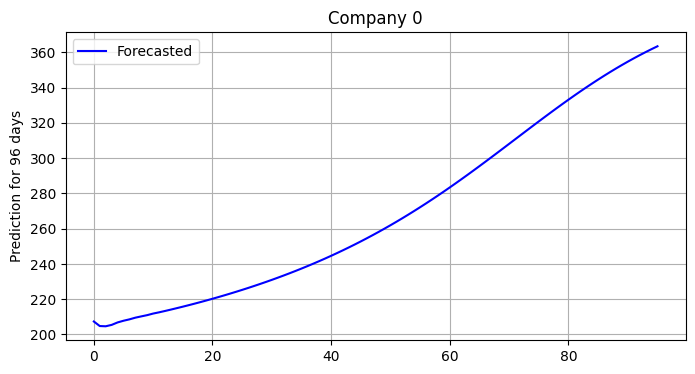

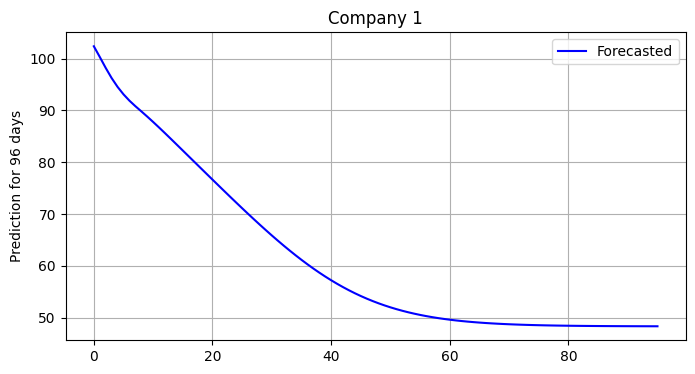

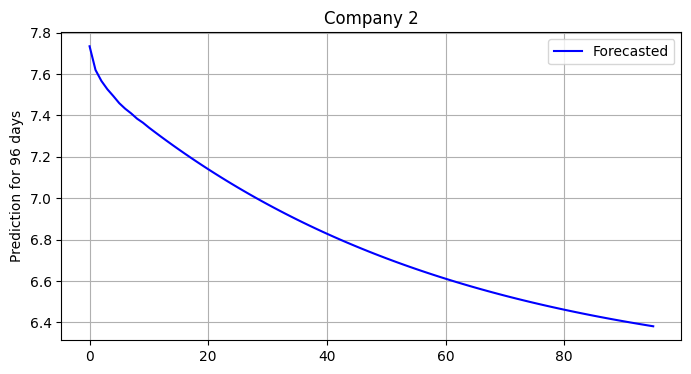

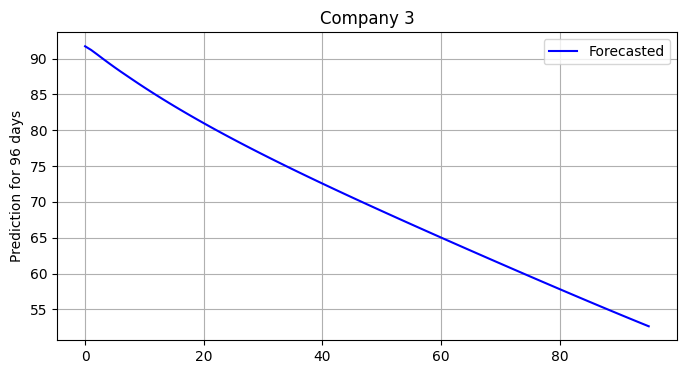

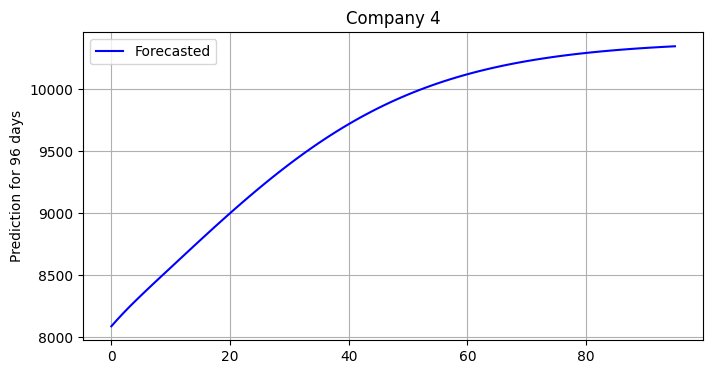

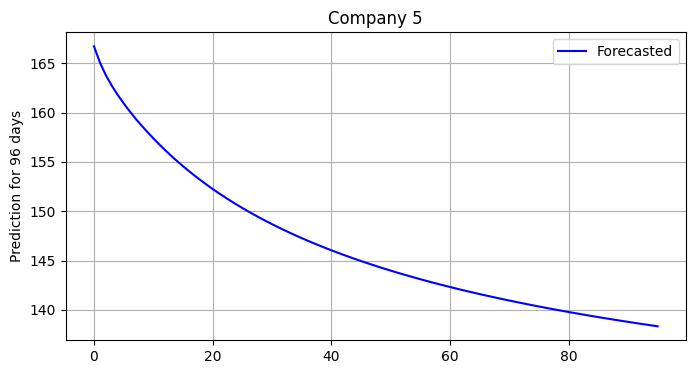

In [ ]:
features = ['lst_output_0', 'lst_output_1', 'lst_output_2', 'lst_output_3', 'lst_output_4', 'lst_output_5']



# Iterate over each company's data
for i, (feature, target) in enumerate(zip(features, targets)):
  plt.figure(figsize=(8, 4))
  plt.plot(eval(feature), 'b', label="Forecasted")
  plt.ylabel('Prediction for 96 days')
  plt.legend()
  plt.grid(True)
  plt.title(f"Company {i}")
  plt.show()


# Converting the predicted result data in submission form

In [ ]:
test_d

,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,207.368713,8750.539062,7.733884,91.710289,8089.424316,166.722565
1,204.794861,8575.633789,7.619447,91.206764,8143.025391,165.083511
2,204.662537,8395.521484,7.566139,90.597679,8194.412109,163.791992
3,205.445816,8228.955078,7.526234,89.971237,8243.684570,162.730408
4,206.839050,8084.282227,7.493513,89.359550,8291.114258,161.793503
...,...,...,...,...,...,...
91,356.591248,4157.583984,6.400598,53.997856,10335.245117,138.692001
92,358.394470,4157.265625,6.395671,53.657219,10338.101562,138.600891
93,360.138763,4156.983398,6.390837,53.318050,10340.817383,138.510986
94,361.823944,4156.733398,6.386096,52.980419,10343.396484,138.422272


In [ ]:
test_d["Id_Company_0"] = lst_output_0.data
test_d["Id_Company_1"] = lst_output_1.data
test_d["Id_Company_2"] = lst_output_2.data
test_d["Id_Company_3"] = lst_output_3.data
test_d["Id_Company_4"] = lst_output_4.data
test_d["Id_Company_5"] = lst_output_5.data

In [ ]:
test_d

,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,207.368713,102.390625,7.733884,91.710289,8089.424316,166.722565
1,204.794861,100.333145,7.619447,91.206764,8143.025391,165.083511
2,204.662537,98.214409,7.566139,90.597679,8194.412109,163.791992
3,205.445816,96.255020,7.526234,89.971237,8243.684570,162.730408
4,206.839050,94.553177,7.493513,89.359550,8291.114258,161.793503
...,...,...,...,...,...,...
91,356.591248,48.361877,6.400598,53.997856,10335.245117,138.692001
92,358.394470,48.358131,6.395671,53.657219,10338.101562,138.600891
93,360.138763,48.354813,6.390837,53.318050,10340.817383,138.510986
94,361.823944,48.351871,6.386096,52.980419,10343.396484,138.422272


In [ ]:
# Create an empty list to store the concatenated values
concatenated_values = []
data = range(576)
# Iterate over each row and column
for index, row in test_d.iterrows():
    for column in test_d.columns:
        concatenated_values.append(row[column])

# Create a DataFrame from the concatenated values
result_df = pd.DataFrame({'Id': data, 'Close': concatenated_values})

# Display the result DataFrame
result_df

,Id,Close
0,0,207.368713
1,1,102.390625
2,2,7.733884
3,3,91.710289
4,4,8089.424316
...,...,...
571,571,48.349270
572,572,6.381445
573,573,52.644390
574,574,10345.843750


In [ ]:
# Assuming result_df is your DataFrame
result_df.to_csv('submission3.csv', index=False)
